<a href="https://colab.research.google.com/github/jackiedepp/tensorflow/blob/master/Copy_of_Exercise4_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [0]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.999: 
      print("\nReached 99.9% accuracy so cancelling trainging!")
      self.model.stop_training = True

callbacks = myCallback()

--2019-06-11 00:42:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.25.112, 2404:6800:4004:801::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.25.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-06-11 00:42:47 (165 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



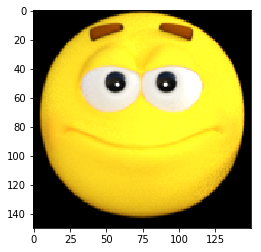

In [0]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img('/tmp/h-or-s/happy/happy1-00.png')
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape
plt.imshow(img)

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s',
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
  )

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [0]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
5/5 [==============================] - 0s 56ms/step - loss: 2.3637 - acc: 0.5125
Epoch 2/15
5/5 [==============================] - 0s 53ms/step - loss: 0.5749 - acc: 0.5375
Epoch 3/15
5/5 [==============================] - 0s 41ms/step - loss: 0.3422 - acc: 0.9000
Epoch 4/15
5/5 [==============================] - 0s 58ms/step - loss: 0.2576 - acc: 0.8750
Epoch 5/15
5/5 [==============================] - 0s 38ms/step - loss: 0.1309 - acc: 0.9625
Epoch 6/15
5/5 [==============================] - 0s 58ms/step - loss: 0.0825 - acc: 0.9625
Epoch 7/15
5/5 [==============================] - 0s 42ms/step - loss: 0.1529 - acc: 0.9375
Epoch 8/15
5/5 [==============================] - 0s 59ms/step - loss: 0.0731 - acc: 0.9750
Epoch 9/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0465 - acc: 0.9875
Epoch 10/15
3/5 [=================>............] - ETA: 0s - loss: 0.0233 - acc: 1.0000
Reached 99.9% accuracy so cancelling trainging!
5/5 [==============================]